In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print(df.shape)

(10000, 14)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [13]:
x=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [14]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [15]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [16]:
x_train.shape

(8000, 11)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [18]:
x_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [19]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [20]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
history=model.fit(x_train_scaled,y_train,epochs=80,validation_split=0.2)

Epoch 1/80
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7972 - loss: 0.5066 - val_accuracy: 0.8000 - val_loss: 0.4675
Epoch 2/80
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7933 - loss: 0.4648 - val_accuracy: 0.8087 - val_loss: 0.4491
Epoch 3/80
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8134 - loss: 0.4330 - val_accuracy: 0.8163 - val_loss: 0.4397
Epoch 4/80
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8310 - loss: 0.4112 - val_accuracy: 0.8231 - val_loss: 0.4347
Epoch 5/80
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8307 - loss: 0.4190 - val_accuracy: 0.8256 - val_loss: 0.4281
Epoch 6/80
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8379 - loss: 0.4036 - val_accuracy: 0.8288 - val_loss: 0.4217
Epoch 7/80
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8322 - loss: 0.4149 - val_accuracy: 0.8294 - val_loss: 0.4155
Epoch 8/80
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8337 - loss: 0.3960 - val_accuracy: 0.

In [24]:
model.layers[0].get_weights()

[array([[-0.30109543,  0.33815747, -0.06619256,  0.12454215, -0.12376148,
         -0.32586613, -0.24200086,  0.24521856, -0.10366939, -0.15098469,
         -0.42467752],
        [ 0.76514316, -0.29984415,  1.3083034 , -0.3524808 ,  0.20376585,
         -0.6941907 ,  0.30684736, -0.2630699 ,  0.76098824, -0.84051204,
          0.48954698],
        [ 0.13363434,  0.03698289, -0.00598516, -0.29132774, -0.06377311,
          0.47195002,  0.21038337, -0.12404943,  0.203501  ,  0.28332487,
          0.34295288],
        [-0.29988223, -0.91041523, -0.03818981, -0.26266548, -0.07087662,
         -0.07759019, -0.41713798,  0.51854324, -0.10558141,  0.02745161,
         -0.35276487],
        [-0.9357267 , -0.33926126,  0.69247586,  0.49353707,  1.1015315 ,
          1.1920569 , -0.35639355, -0.4786854 ,  0.18450573, -0.03195712,
          0.11383408],
        [ 0.03206484, -0.10415967, -0.08865691,  0.20887768,  0.16972223,
         -0.649216  , -0.48943585, -0.5128515 ,  0.34884086,  0.8705085

In [25]:
model.layers[1].get_weights()

[array([[-5.70501052e-02, -1.86084181e-01, -3.82091969e-01,
         -5.29578507e-01, -1.70171010e+00,  1.34545872e-02,
         -5.13416708e-01,  2.58091956e-01,  1.02310389e-01,
          3.51896048e-01,  4.35518712e-01],
        [ 4.51817334e-01,  1.28512070e-01,  2.77109534e-01,
          4.22003150e-01, -5.95427930e-01, -4.70390439e-01,
          4.13026184e-01,  6.51556104e-02,  2.72509396e-01,
          7.86811352e-01,  3.84466350e-01],
        [ 2.79367398e-02, -8.96507621e-01,  5.55879951e-01,
          1.50644466e-01,  3.76447171e-01,  4.29068506e-01,
         -5.19937575e-01, -3.00127864e-01, -7.42949620e-02,
         -7.71763250e-02,  4.42622721e-01],
        [ 3.25291961e-01,  2.16042310e-01,  3.31995934e-01,
          1.67354167e-01,  3.69805664e-01, -2.16367692e-01,
          2.39931658e-01, -4.53281283e-01, -3.38051200e-01,
         -1.20752327e-01, -3.69282931e-01],
        [-5.48057079e-01,  7.35072374e-01, -1.18456340e+00,
          2.35450089e-01,  4.20951635e-01,  

In [26]:
x_test_scaled

array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.58312392,
        -0.57273139,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.58312392,
        -0.57273139,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ..., -0.58312392,
         1.74601919,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ...,  1.71490137,
        -0.57273139, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [27]:
y_log=model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [28]:
y_pred=np.where(y_log>0.5,1,0)

In [29]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test,y_pred)

0.862

In [32]:
history.history

{'accuracy': [0.797656238079071,
  0.8053125143051147,
  0.8153125047683716,
  0.8223437666893005,
  0.8267187476158142,
  0.8296874761581421,
  0.8329687714576721,
  0.8340625166893005,
  0.8387500047683716,
  0.842968761920929,
  0.8471875190734863,
  0.8490625023841858,
  0.8525000214576721,
  0.8557812571525574,
  0.8565624952316284,
  0.8587499856948853,
  0.8606250286102295,
  0.8589062690734863,
  0.8606250286102295,
  0.8606250286102295,
  0.8607812523841858,
  0.8609374761581421,
  0.8642187714576721,
  0.8612499833106995,
  0.862500011920929,
  0.8609374761581421,
  0.8634374737739563,
  0.8629687428474426,
  0.8620312213897705,
  0.8631250262260437,
  0.8631250262260437,
  0.8626562356948853,
  0.8639062643051147,
  0.8637499809265137,
  0.8629687428474426,
  0.8628125190734863,
  0.8643749952316284,
  0.8629687428474426,
  0.8639062643051147,
  0.8651562333106995,
  0.8651562333106995,
  0.864062488079071,
  0.864062488079071,
  0.8637499809265137,
  0.8654687404632568,
  0

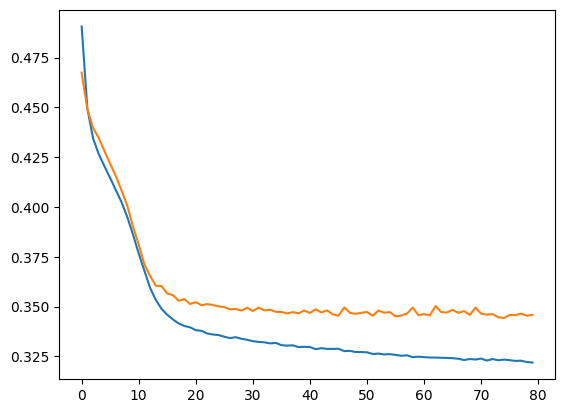

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

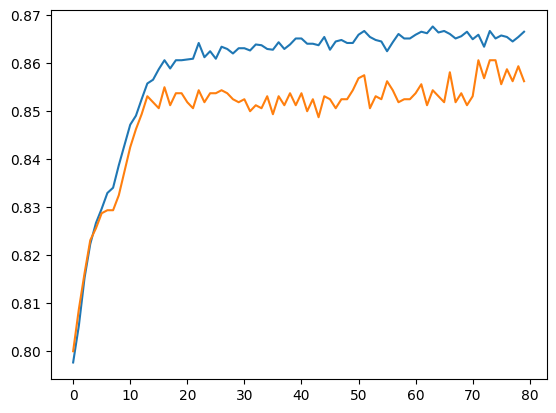

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])